In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from ising import create_lattice, compute_hamiltonian, monte_carlo_metropolis
import matplotlib
from matplotlib import pyplot as plt

In [3]:
def plot_lattice(lattice):
    cmap = matplotlib.colors.ListedColormap(["blue", "red"])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
    ax.imshow(lattice, cmap=cmap, vmin=-1, vmax=1)


def plot_lattice_init_end(output):
    cmap = matplotlib.colors.ListedColormap(["blue", "red"])
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    axs[0].imshow(output["lattices"][0], cmap=cmap, vmin=-1, vmax=1)
    axs[1].imshow(output["lattices"][-1], cmap=cmap, vmin=-1, vmax=1)


def plot_observable(output, key):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    ax.plot(output["time"], output[key])

Let us start with large temperature configurations. We know the critical value of the Ising model in 2D.

In [4]:
betac = 0.441

We see that when we vary $\beta$ across the transition temperature, we go from a disordered to an ordered phase.

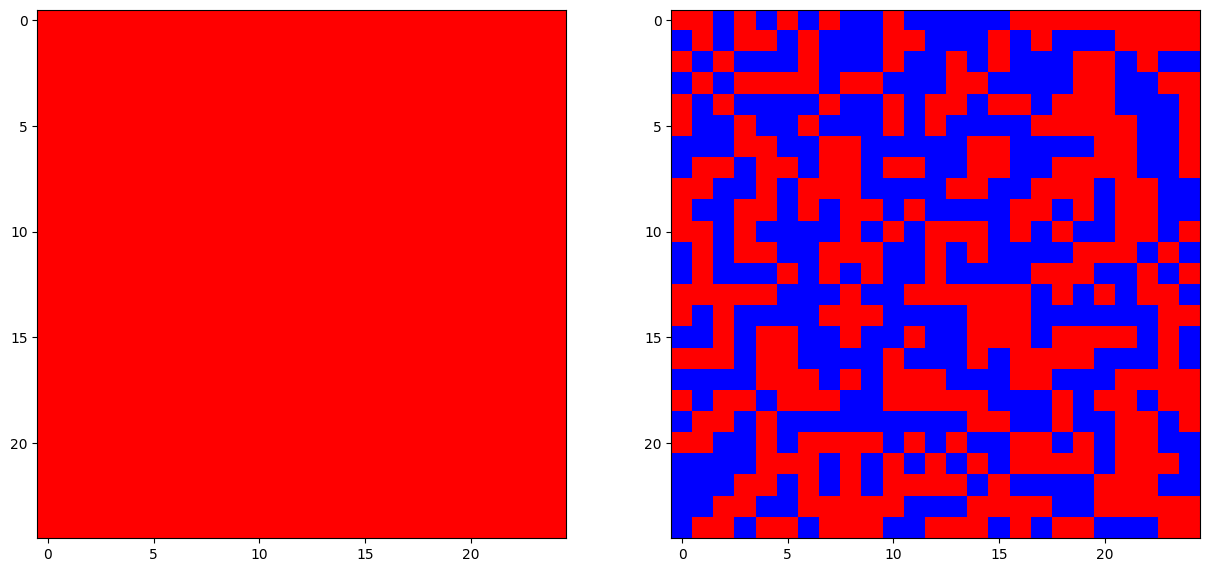

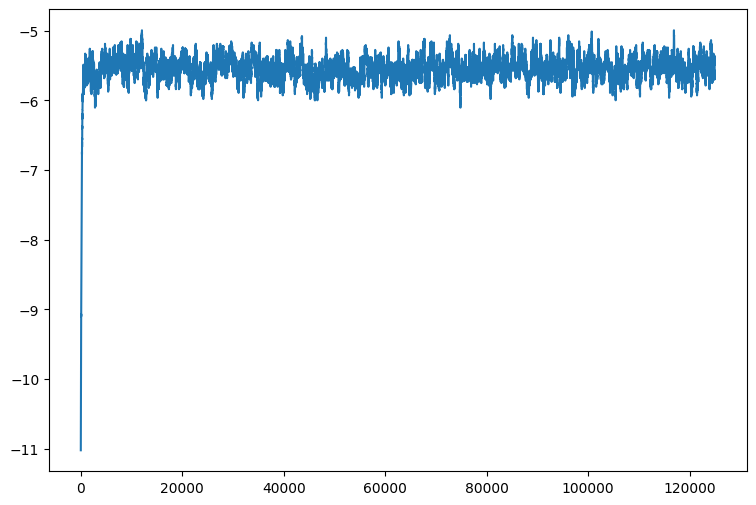

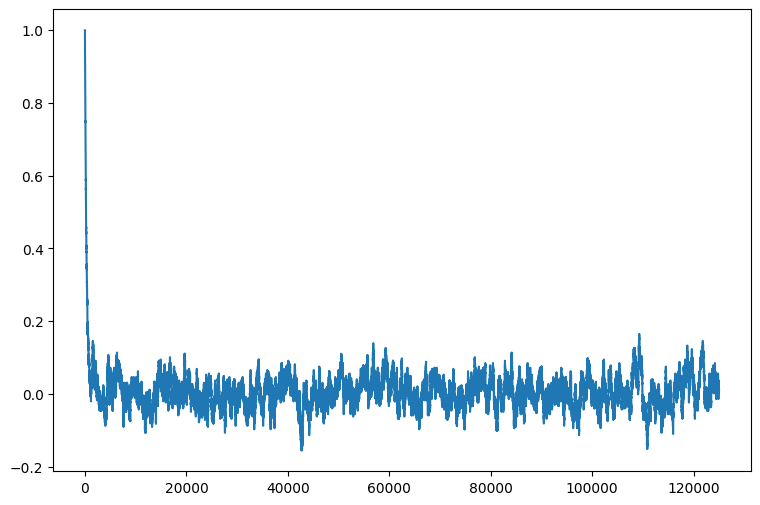

In [5]:
output = monte_carlo_metropolis(
    n=25, beta=0.01 * betac, h=0.0, max_steps=200, initial_state=1,
)
plot_lattice_init_end(output)
plot_observable(output, "benergies")
plot_observable(output, "magnetizations")

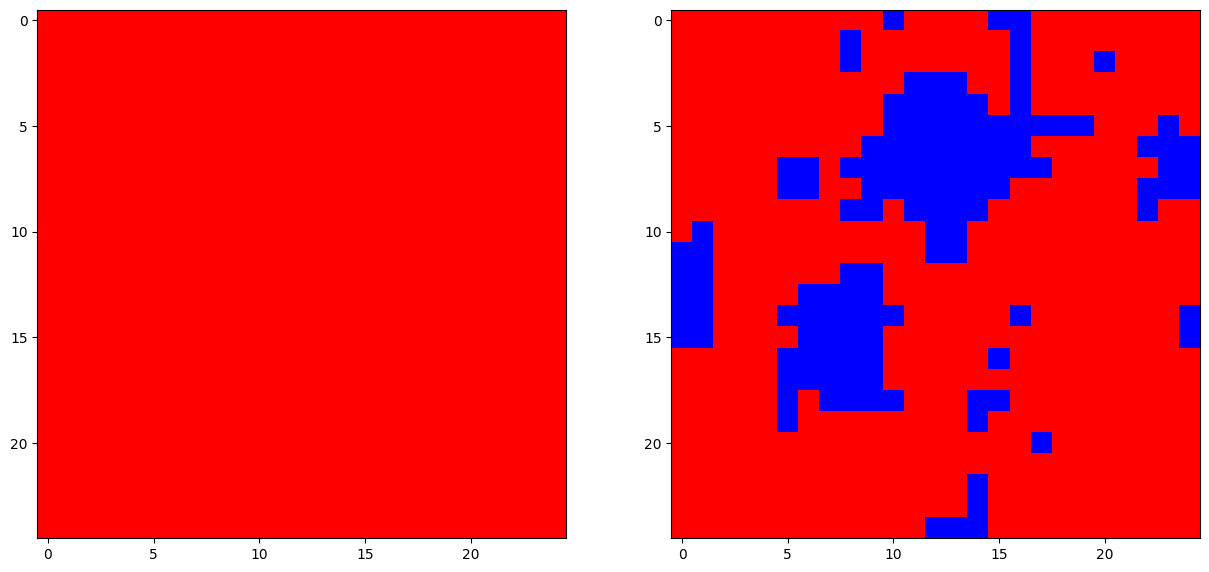

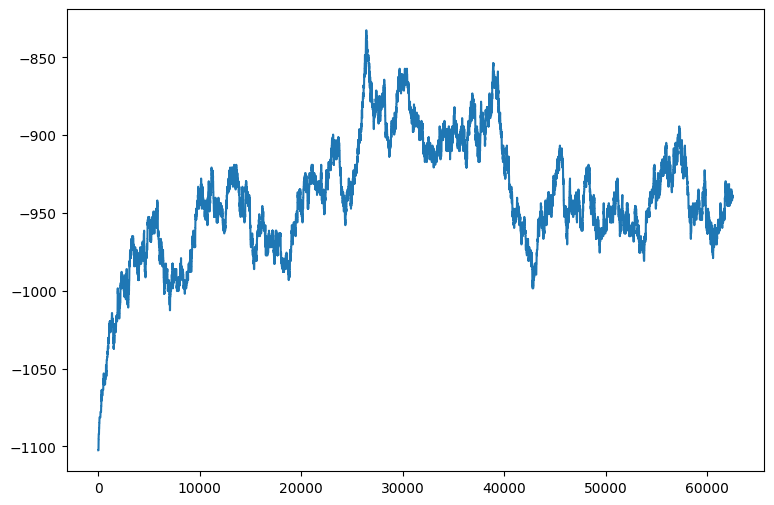

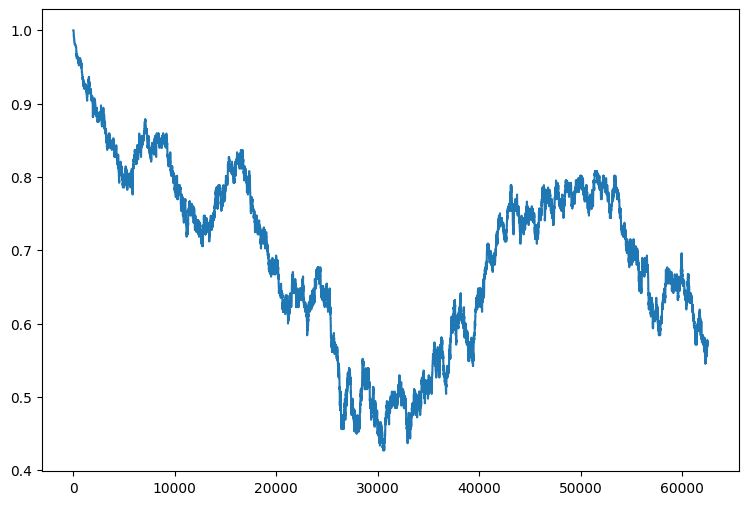

In [6]:
output = monte_carlo_metropolis(
    n=25, beta=1.0 * betac, h=0.0, max_steps=100, initial_state=1
)
plot_lattice_init_end(output)
plot_observable(output, "benergies")
plot_observable(output, "magnetizations")

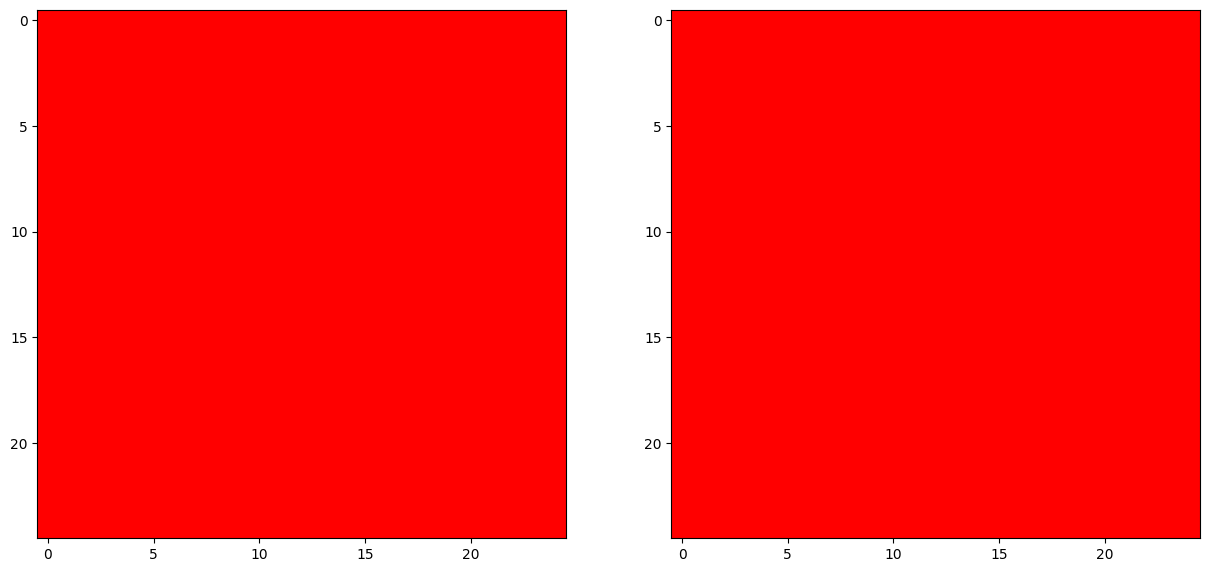

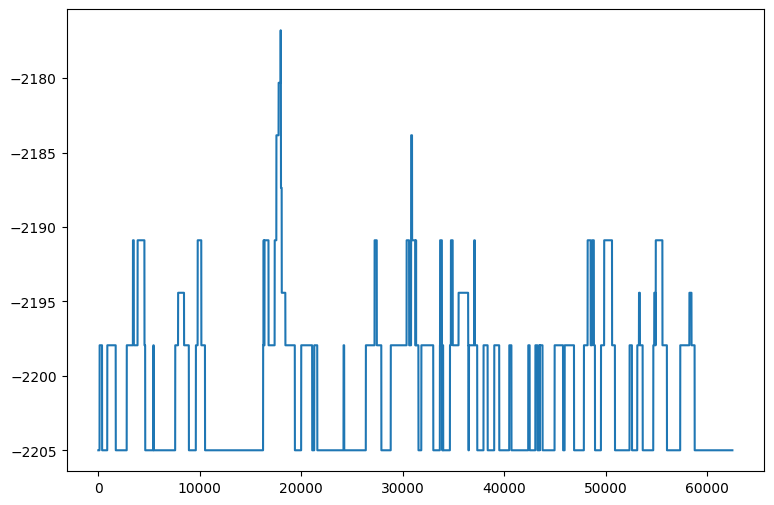

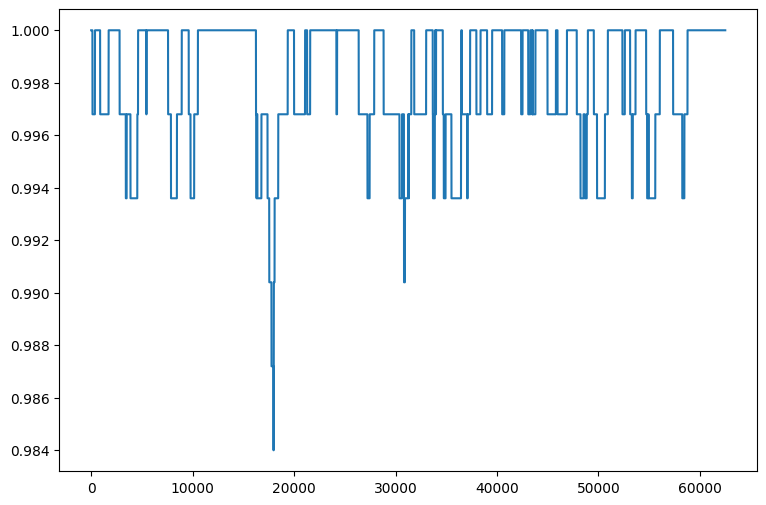

In [7]:
output = monte_carlo_metropolis(
    n=25, beta=2.0 * betac, h=0.0, max_steps=100, initial_state=1
)
plot_lattice_init_end(output)
plot_observable(output, "benergies")
plot_observable(output, "magnetizations")

Now let's see if we can check thoroughly the transition from the observables. We start by varying temperature while starting from a hot state.

In [8]:
betas = betac * np.linspace(0.01, 5.0, num=20)
outputs_series_T = [
    monte_carlo_metropolis(
        n=25, beta=beta, h=0.0, max_steps=200, initial_state=0
    )
    for beta in betas
]

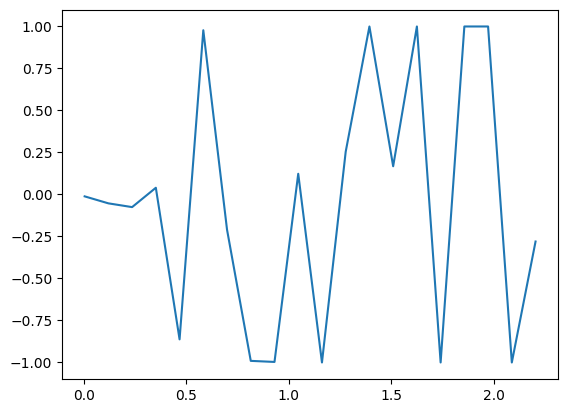

In [9]:
mags = [output["magnetizations"][-1] for output in outputs_series_T]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(betas, mags)

Interestingly the transition is not obvious from this state. What happens there? We see by plotting the last temperature that from this choice of initial state, the number of iterations is not always enough.

5.0


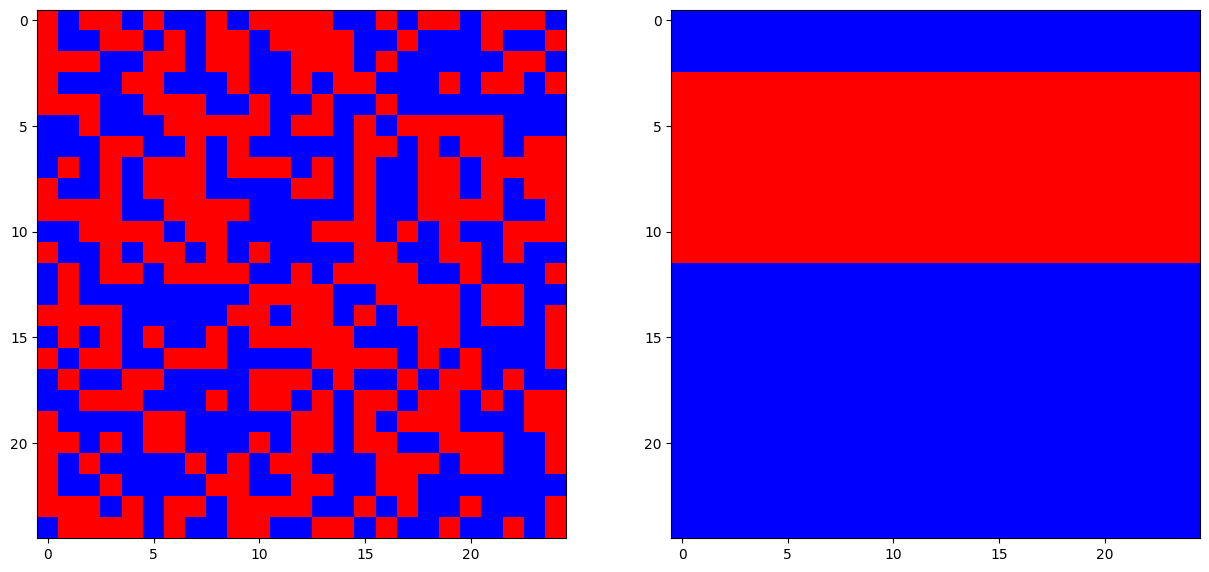

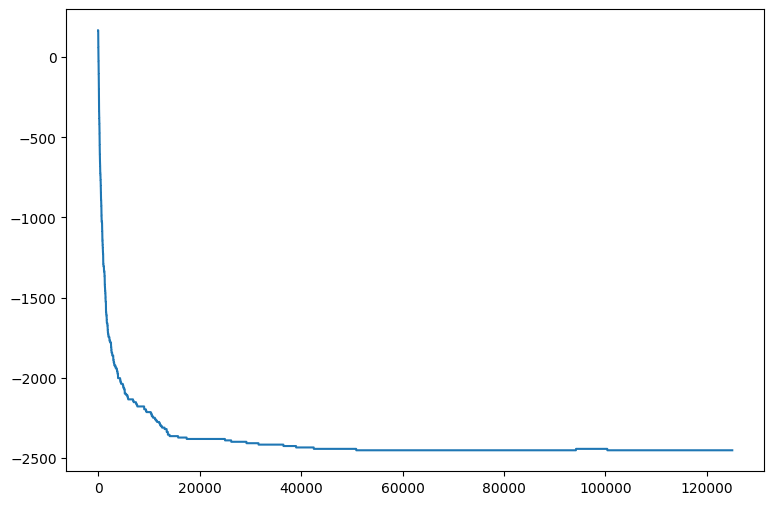

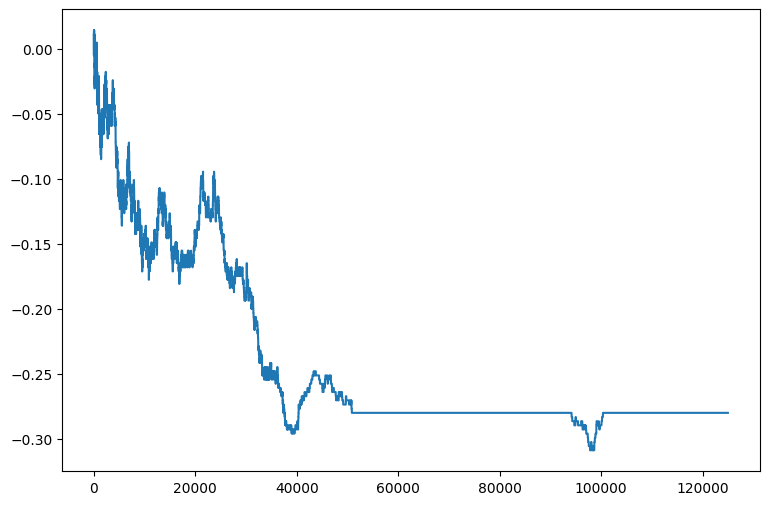

In [13]:
val_choice = -1
print(outputs_series_T[val_choice]["beta"]/betac)
plot_lattice_init_end(outputs_series_T[val_choice])
plot_observable(outputs_series_T[val_choice], "benergies")
plot_observable(outputs_series_T[val_choice], "magnetizations")

0.01


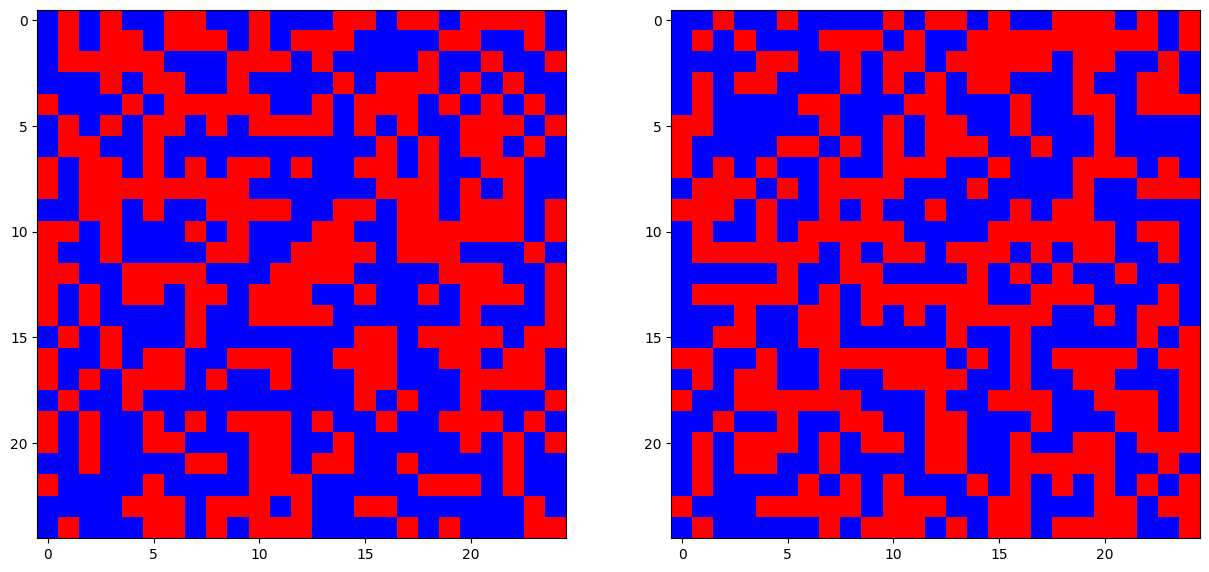

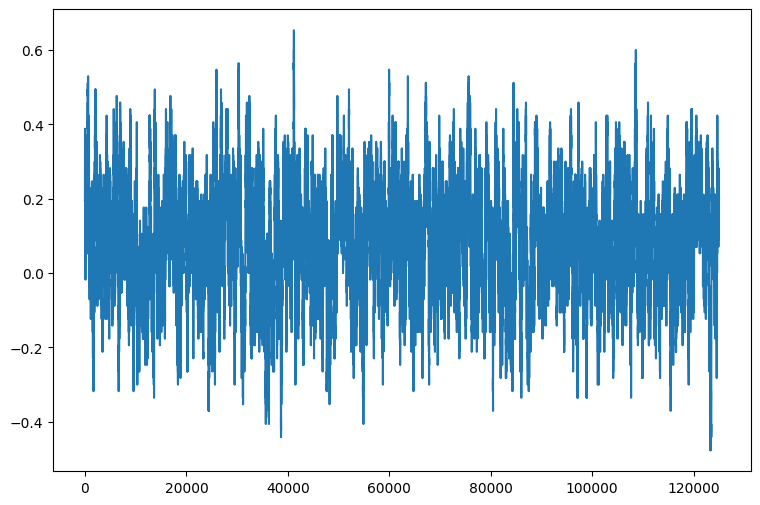

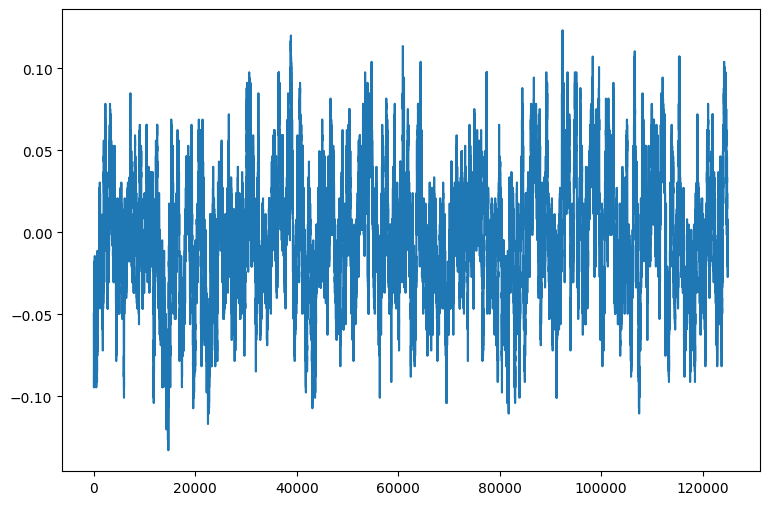

In [11]:
val_choice = 0
print(outputs_series_T[val_choice]["beta"]/betac)
plot_lattice_init_end(outputs_series_T[val_choice])
plot_observable(outputs_series_T[val_choice], "benergies")
plot_observable(outputs_series_T[val_choice], "magnetizations")

In [14]:
betas = betac * np.linspace(0.01, 2.0, num=20)
outputs_series_T_from_up = [
    monte_carlo_metropolis(
        n=25, beta=beta, h=0.0, max_steps=200, initial_state=1
    )
    for beta in betas
]

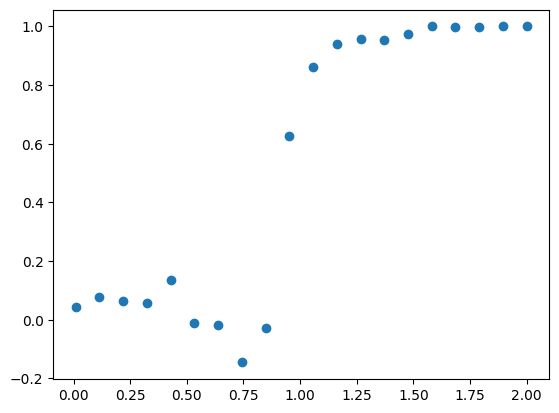

In [15]:
mags_from_up = [output["magnetizations"][-1] for output in outputs_series_T_from_up]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(betas/betac, mags_from_up)

0.11473684210526315


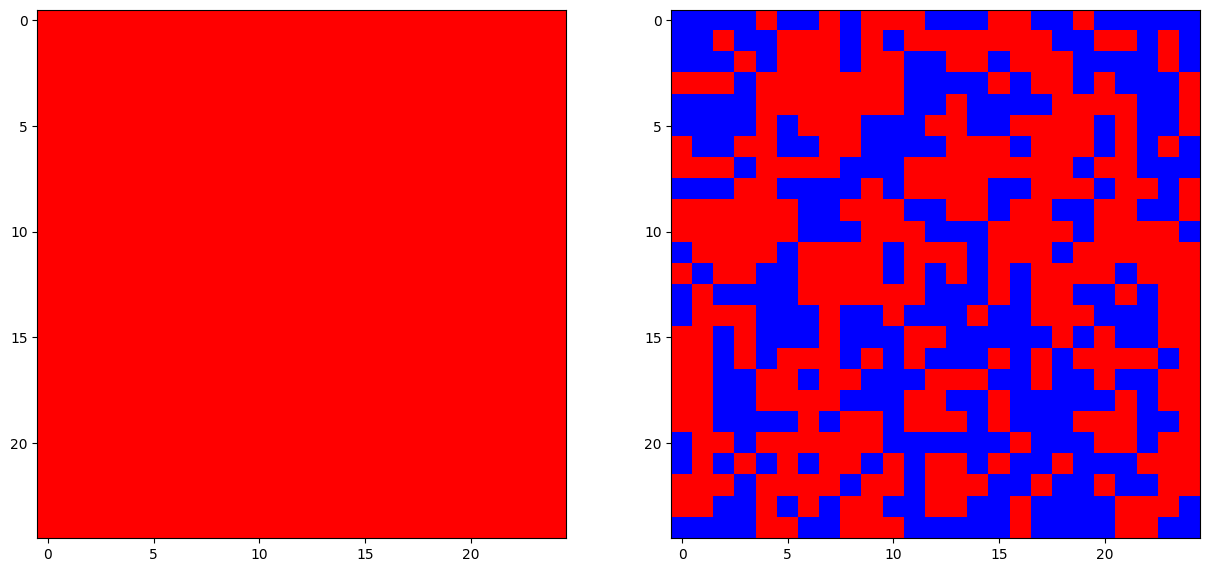

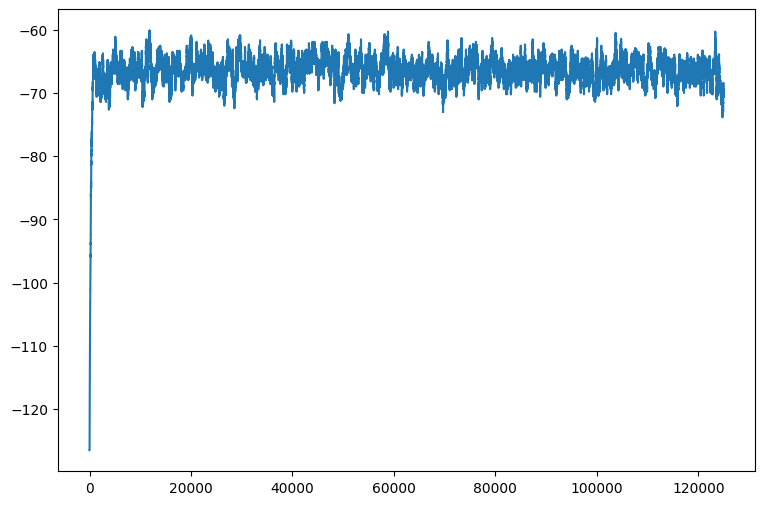

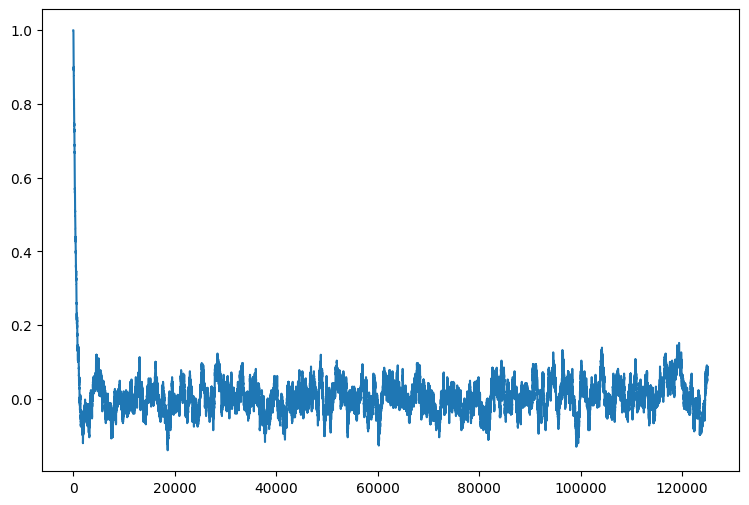

In [16]:
val_choice = 1
print(outputs_series_T_from_up[val_choice]["beta"]/betac)
plot_lattice_init_end(outputs_series_T_from_up[val_choice])
plot_observable(outputs_series_T_from_up[val_choice], "benergies")
plot_observable(outputs_series_T_from_up[val_choice], "magnetizations")